In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Distance:
    def __init__(self):
        self.distance = 0.0
        self.angle = 0.0
        self.index = 0
        self.position = 0.0

# Фигуры

In [4]:
def generate_square_points(side_length, num_points_per_side):
    points = []
    step = side_length / (num_points_per_side - 1)
    
    # Верхняя и нижняя стороны квадрата
    for i in range(num_points_per_side):
        points.append(Point(i * step, 0))              # Нижняя сторона
        points.append(Point(i * step, side_length))    # Верхняя сторона

    # Левая и правая стороны квадрата
    for i in range(1, num_points_per_side - 1):
        points.append(Point(0, i * step))              # Левая сторона
        points.append(Point(side_length, i * step))    # Правая сторона

    return points

# Генерация точек квадрата
side_length = 10  # Длина стороны квадрата
num_points_per_side = 20  # Количество точек на каждой стороне
source_points = generate_square_points(side_length, num_points_per_side)

In [123]:
def generate_pentagon_points(side_length, num_points_per_side):
    points = []
    angle_step = 2 * np.pi / 5  # Угол между вершинами пятиугольника

    # Генерация вершин пятиугольника
    for i in range(5):
        angle = i * angle_step
        # Координаты вершины
        vertex_x = side_length * np.cos(angle) / 2  # Делим на 2, чтобы вписать в радиус
        vertex_y = side_length * np.sin(angle) / 2
        points.append(Point(vertex_x, vertex_y))

    # Генерация точек на каждой стороне
    for i in range(5):
        start_point = points[i]
        end_point = points[(i + 1) % 5]  # Следующая вершина (замыкание)
        step = np.linspace(0, 1, num_points_per_side)  # Линейные промежутки

        for j in step:
            x = (1 - j) * start_point.x + j * end_point.x
            y = (1 - j) * start_point.y + j * end_point.y
            points.append(Point(x, y))

    return points

# Генерация точек пятиугольника
side_length = 10  # Длина стороны пятиугольника
num_points_per_side = 20  # Количество точек на каждой стороне
source_points = generate_pentagon_points(side_length, num_points_per_side)

In [152]:
def generate_circle_points(radius, num_points):
    points = []
    angle_step = 2 * np.pi / num_points  # Угол между соседними точками

    for i in range(num_points):
        angle = i * angle_step
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        points.append(Point(x, y))

    return points

# Генерация точек окружности
radius = 10  # Радиус окружности
num_points = 100  # Количество точек на окружности
source_points = generate_circle_points(radius, num_points)

In [13]:
source_points = [Point(0.5, 0.3), Point(0.4, 0.6), Point(0.9, 0.7)]  # Пример точек

# Применение

In [5]:
# Расчет центра фигуры
center_x = sum([point.x for point in source_points]) / len(source_points)
center_y = sum([point.y for point in source_points]) / len(source_points)

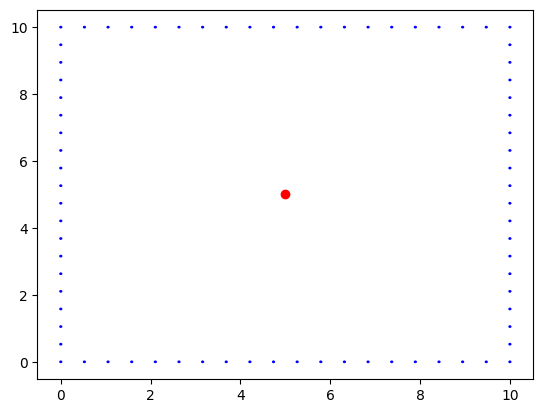

In [6]:
# Создаем фигуру и оси для графика
fig, ax = plt.subplots()

# Рисуем точки
for point in source_points:
  circle = Circle((point.x, point.y), radius=0.02, color='blue') # Создаем круг для точки
  ax.add_patch(circle) # Добавляем круг на график

# Рисуем центр
ax.plot(center_x, center_y, 'ro') # Рисуем красный кружок в центре

# Отображаем график
plt.show()

In [7]:
center_x, center_y

(5.0, 5.0)

In [8]:
# Расчет расстояний от точек до центра
distancies = []
for index, point in enumerate(source_points):
    distance = Distance()
    delta_x = point.x - center_x
    delta_y = point.y - center_y
    distance.distance = delta_x ** 2 + delta_y ** 2
    distance.angle = np.arctan2(delta_x, delta_y)
    distance.index = index
    distancies.append(distance)

# Массив расстояний
distances_to_center = [d.distance for d in distancies]
indexes = [i.index for i in distancies]

In [9]:
#min(distances_to_center)

count = 0
for i in range(len(distances_to_center)):
    if abs(distances_to_center[i] - max(distances_to_center)) < 1e-15:
        count += 1
        #print(i)

count

4

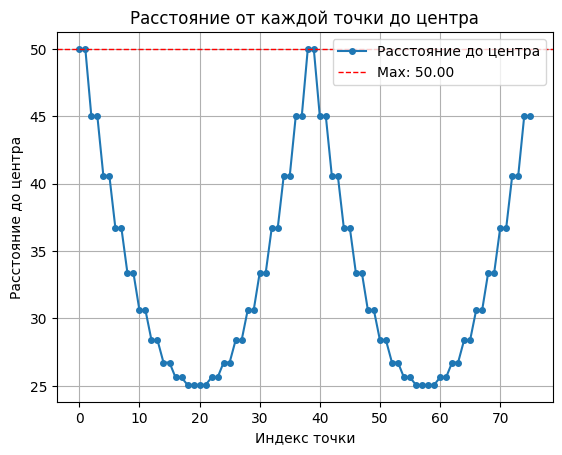

In [10]:
# Построение графика
plt.plot(indexes, distances_to_center, marker='o', markersize=4, label='Расстояние до центра')  # Уменьшите markersize
plt.title('Расстояние от каждой точки до центра')
plt.xlabel('Индекс точки')
plt.ylabel('Расстояние до центра')
plt.grid(True)


# Добавление линии для максимального расстояния
max_distance = max(distances_to_center)
plt.axhline(y=max_distance, color='r', linestyle='--', linewidth=1, label=f'Max: {max_distance:.2f}')

# Добавление легенды
plt.legend()

plt.show()

In [11]:
distancies.sort(key=lambda d: d.angle)

# Нормализация расстояний, чтобы дальнейшие расчеты не зависели от размера фигуры.
minimal_angle = float('inf')
maximal_angle = float('-inf')
maximal_distance = float('-inf')

for distance in distancies:
    minimal_angle = min(distance.angle, minimal_angle)
    maximal_angle = max(distance.angle, maximal_angle)
    maximal_distance = max(distance.distance, maximal_distance)

for distance in distancies:
    distance.distance /= maximal_distance
    distance.position = len(source_points) * (distance.angle - minimal_angle) / (maximal_angle - minimal_angle)

In [12]:
# Определение функции бинарного поиска
def binary_search(distancies, target):
    low, high = 0, len(distancies) - 1
    while low <= high:
        mid = (low + high) // 2
        if distancies[mid].position < target.position:
            low = mid + 1
        elif distancies[mid].position > target.position:
            high = mid - 1
        else:
            return mid
    return -low - 1  # Возвращаем отрицательное значение, если не найдено

In [13]:
# Вычисление массива расстояний, в котором угол будет изменяться линейно относительно индекса в массиве.
for index in range(len(source_points)):
    dd = Distance()
    dd.position = index

    # Бинарный поиск
    found = binary_search(distancies, dd)

    if found >= 0:
        source_points[index] = distancies[found].distance
    else:
        point = -found - 1
        left = distancies[point - 1]
        right = distancies[point]
        factor = (index - left.position) / (left.position - right.position)

        source_points[index] = left.distance + factor * (left.distance - right.distance)

        if factor < 0.5:
            indexes[index] = point - 1
        else:
            indexes[index] = point

In [14]:
#Получаем массивы углов и расстояний
angles = [d.angle for d in distancies]
distances_to_center = [d.distance for d in distancies]

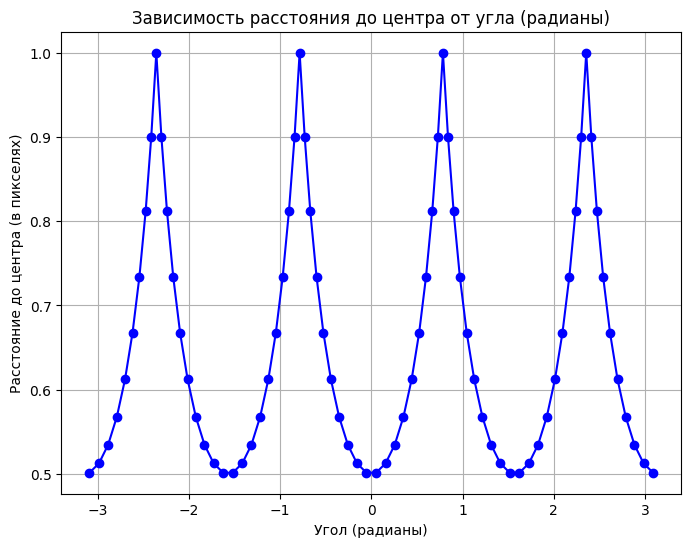

In [15]:
# Построение графика зависимости расстояния от угла
plt.figure(figsize=(8, 6))
plt.plot(angles, distances_to_center, marker='o', linestyle='-', color='b')
plt.title('Зависимость расстояния до центра от угла (радианы)')
plt.xlabel('Угол (радианы)')
plt.ylabel('Расстояние до центра (в пикселях)')
plt.grid(True)
plt.show()

In [164]:
# Функция для обнаружения пиков
def peak_detect(data_size):
    size = data_size // (2 * 5 + 1)
    center = (size // 2) | 1
    values = np.zeros(size)
    kernel_sum = 0.0

    for index in range(size):
        factor = abs(index - center) / (center + 1.0)
        values[index] = np.sqrt((1 - factor) ** 2 + 1) - 1
        kernel_sum += values[index]

    values -= kernel_sum / size

    return Kernel(values, center)

In [165]:
class Kernel:
    def __init__(self, values, center):
        self.values = values
        self.center = center

In [166]:
def create_kernel(size):
    kernel_values = np.zeros(size)
    kernel_sum = 0.0
    center = size // 2

    for index in range(size):
        factor = abs(index - center) / (center + 1.0)
        kernel_values[index] = np.sqrt((1 - factor) ** 2 + 1) - 1
        kernel_sum += kernel_values[index]

    # Нормируем ядро
    kernel_values += -kernel_sum / size
    return Kernel(kernel_values, center)

In [167]:
# Применение свертки
def apply_kernel(data, kernel):
    result = np.zeros(len(data))
    for data_index in range(len(data)):
        sum_value = 0.0
        for kernel_index in range(len(kernel.values)):
            offset = data_index + kernel_index - kernel.center
            if offset < 0:
                offset += len(data)
            if offset >= len(data):
                offset -= len(data)
            sum_value += kernel.values[kernel_index] * data[offset]
        result[data_index] = sum_value
    return result

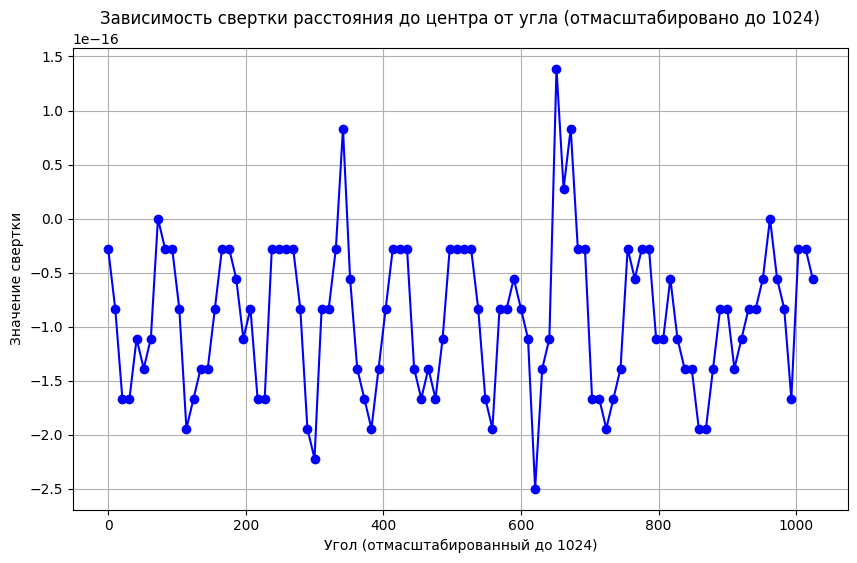

In [168]:
# Создаем ядро для свертки
kernel_size = 11  # Размер ядра
kernel = create_kernel(kernel_size)

# Применяем свертку к нормализованным расстояниям
convolved_values = apply_kernel([d.distance for d in distancies], kernel)

# Масштабируем углы для графика
scaled_angles = np.linspace(0, 1024, num=len(convolved_values))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(scaled_angles, convolved_values, marker='o', linestyle='-', color='b')
plt.title('Зависимость свертки расстояния до центра от угла (отмасштабировано до 1024)')
plt.xlabel('Угол (отмасштабированный до 1024)')
plt.ylabel('Значение свертки')
plt.grid(True)
plt.show()

In [169]:
# Выбирает начальную позицию так, чтобы она находилась на границе.
start_index = 0

while start_index < len(convolved_values) and convolved_values[start_index] >= 0.0:
    print(convolved_values[start_index], start_index)
    start_index += 1

start_index

0

In [151]:
while start_index < len(convolved_values) and convolved_values[start_index] < 0.0:
    start_index += 1

start_index

11

In [171]:
# Для каждого пика выбираем точку с максимальным значением.
found = []
in_point = True
max_value = convolved_values[start_index]
max_index = indexes[start_index]

for index in range(len(convolved_values)):
    offset = index + start_index

    if offset >= len(convolved_values):
        offset -= len(convolved_values)

    value = convolved_values[offset]

    if value >= 0.0 and in_point:
        if max_value < value:
            max_value = value
            max_index = offset
    elif value >= 0.0 and not in_point:
        max_value = value
        max_index = offset
        in_point = True
    elif value < 0.0 and in_point:
        distance = distancies[indexes[max_index]]
        found.append(distance)
        print(max_index)
        in_point = False
    elif value < 0.0 and not in_point:
        pass

0
7
33
63
93


In [172]:
# Получаем координаты углов
corner_coordinates = []
for corner in found:
    corner_coordinates.append(source_points[corner.index])  # Добавляем соответствующую точку

In [173]:
corner_coordinates[0].x

np.float64(-1.8369701987210296e-15)

In [174]:
corner_coordinates[1].x

np.float64(-3.6812455268467783)

In [175]:
corner_coordinates[2].x

np.float64(-9.048270524660197)

In [176]:
corner_coordinates[3].x

np.float64(6.845471059286886)

In [177]:
# Проверка на окружность
is_circle = all(value > 1.0 for value in convolved_values)
is_circle

False

In [178]:
# Нормализация расстояний
minimal_angle = min(d.angle for d in distancies)
maximal_angle = max(d.angle for d in distancies)
maximal_distance = max(d.distance for d in distancies)

for distance in distancies:
    distance.distance /= maximal_distance
    distance.position = len(source_points) * (distance.angle - minimal_angle) / (maximal_angle - minimal_angle)

# Вычисляем массив расстояний с линейным изменением угла
data = [0] * len(source_points)
indexes = [0] * len(source_points)

for index in range(len(data)):
    dd = Distance()
    dd.position = index
    found = next((i for i, d in enumerate(distancies) if d.position == dd.position), -1)
    
    if found >= 0:
        data[index] = distancies[found].distance
    else:
        point = max(0, -found - 1)
        left = distancies[point - 1]
        right = distancies[point]
        factor = (index - left.position) / (left.position - right.position)
        data[index] = left.distance + factor * (left.distance - right.distance)
        
        if factor < 0.5:
            indexes[index] = point - 1
        else:
            indexes[index] = point

# Функция для обнаружения пиков
def peak_detect(data_size):
    size = data_size // (2 * 5 + 1)
    center = (size // 2) | 1
    values = np.zeros(size)
    kernel_sum = 0.0

    for index in range(size):
        factor = abs(index - center) / (center + 1.0)
        values[index] = np.sqrt((1 - factor) ** 2 + 1) - 1
        kernel_sum += values[index]

    values -= kernel_sum / size

    return Kernel(values, center)

# Применение свертки
def apply_kernel(data, kernel):
    result = np.zeros(len(data))
    for data_index in range(len(data)):
        sum_value = 0.0
        for kernel_index in range(len(kernel.values)):
            offset = data_index + kernel_index - kernel.center
            if offset < 0:
                offset += len(data)
            if offset >= len(data):
                offset -= len(data)
            sum_value += kernel.values[kernel_index] * data[offset]
        result[data_index] = sum_value
    return result

# Выбор начальной позиции
start_index = 0
filtered = [0.0] * len(data)  # Пример фильтрованного массива

# Найдем индекс, где значения меньше 0
while start_index < len(filtered) and filtered[start_index] >= 0.0:
    start_index += 1

# Если дошли до конца, вернемся в начало
if start_index >= len(filtered):
    start_index = 0

# Теперь найдем первое значение большее или равное 0
while start_index < len(filtered) and filtered[start_index] < 0.0:
    start_index += 1

# Если start_index снова вышел за пределы, нужно сбросить его
if start_index >= len(filtered):
    start_index = 0

# Поиск пиков
found = []
in_point = True
max_value = filtered[start_index]  # Здесь теперь start_index безопасен
max_index = indexes[start_index]

for index in range(len(filtered)):
    offset = (index + start_index) % len(filtered)
    value = filtered[offset]

    if value >= 0.0 and in_point:
        if max_value < value:
            max_value = value
            max_index = offset
    elif value >= 0.0 and not in_point:
        max_value = value
        max_index = offset
        in_point = True
    elif value < 0.0 and in_point:
        found.append(distancies[indexes[max_index]])
        in_point = False

# Проверка на окружность
is_circle = all(value <= 1.0 for value in filtered)

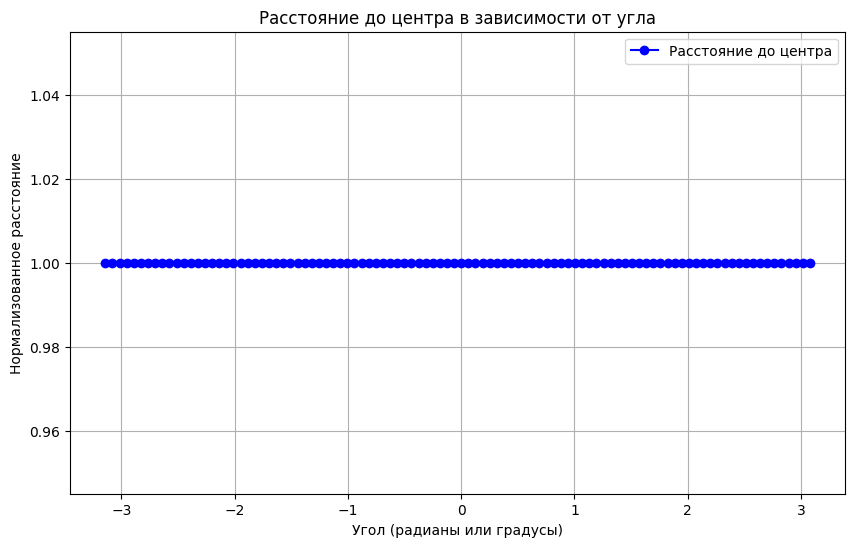

In [179]:
# Предполагаем, что у вас есть следующие списки
angles = [distance.angle for distance in distancies]  # Углы
distances = [distance.distance for distance in distancies]  # Нормализованные расстояния

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(angles, distances, marker='o', linestyle='-', color='b', label='Расстояние до центра')

# Добавляем заголовок и подписи осей
plt.title('Расстояние до центра в зависимости от угла')
plt.xlabel('Угол (радианы или градусы)')
plt.ylabel('Нормализованное расстояние')

# Добавляем сетку
plt.grid()

# Добавляем легенду
plt.legend()

# Показываем график
plt.show()